<a href="https://colab.research.google.com/github/JohnNun/pneumonia_identification_project/blob/main/pneumonia_identification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pneumonia Identification Project

# Business and Data Understanding


# Data preparation

In [1]:
# For Google Colab only
!pip install keras
!pip install keras_preprocessing
!pip install tensorflow
!pip install scikeras[tensorflow]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00


In [2]:
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
import numpy as np
import os

In [3]:
# Following code taken from stackoverflow user fdsig
import json
import os
from pathlib import Path

# your api key
api_key = {
'username':"" ,
'key':""}

# uses pathlib Path
kaggle_path = Path('/root/.kaggle')
os.makedirs(kaggle_path, exist_ok=True)

# opens file and dumps python dict to json object
with open (kaggle_path/'kaggle.json', 'w') as handl:
    json.dump(api_key,handl)

os.chmod(kaggle_path/'kaggle.json', 600)

In [4]:
# Downloading and Importing images
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [5]:
# Linking directory path
train_data_dir = 'chest_xray/train'
val_data_dir = 'chest_xray/val'

In [7]:
# Getting train and validation data from directory
val_generator = ImageDataGenerator().flow_from_directory(val_data_dir, target_size=(64, 64), batch_size=32, seed=42)
train_generator = ImageDataGenerator().flow_from_directory(train_data_dir, target_size=(64, 64), batch_size=1304, seed=42)

Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [8]:
# Creating datasets
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)

In [9]:
# test
data_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True, rotation_range=45, zoom_range=0.25)

In [56]:
# Test
val_generator_test = data_gen.flow_from_directory(val_data_dir, target_size=(64, 64), batch_size=16, class_mode='categorical', seed=42)
train_generator_test = data_gen.flow_from_directory(train_data_dir, target_size=(64, 64), batch_size=1304, class_mode='categorical', seed=42)

Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [57]:
# test
train_images_test, train_labels_test = next(train_generator_test)
val_images_test, val_labels_test = next(val_generator_test)

In [58]:
print(np.shape(train_images_test))
print(np.shape(train_labels_test))
print(np.shape(val_images_test))
print(np.shape(val_labels_test))

(1304, 64, 64, 3)
(1304, 2)
(16, 64, 64, 3)
(16, 2)


In [59]:
# Reshaping data Test
train_img_unrow_test = train_images_test.reshape(1304, -1)
val_img_unrow_test = val_images_test.reshape(16, -1)

In [60]:
print(np.shape(train_img_unrow_test))
print(np.shape(val_img_unrow_tes))

(1304, 12288)
(16, 12288)


In [61]:
train_img_unrow_test[50]

array([0.03921569, 0.03921569, 0.03921569, ..., 0.80546963, 0.80546963,
       0.80546963], dtype=float32)

In [13]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(val_images))
print(np.shape(val_labels))

(1304, 64, 64, 3)
(1304, 2)
(16, 64, 64, 3)
(16, 2)


In [23]:
# Reshaping data
train_img_unrow = train_images.reshape(1304, -1)
val_img_unrow = val_images.reshape(16, -1)

In [24]:
print(np.shape(train_img_unrow))
print(np.shape(val_img_unrow))

(1304, 12288)
(16, 12288)


In [27]:
# Normalizing data
train_img_final = train_img_unrow/255.0
val_img_final = val_img_unrow/255.0

In [33]:
train_img_final[50]

array([0.14901961, 0.14901961, 0.14901961, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [34]:
# Scaling data
train_scaled_data = (train_img_unrow/255.0) * 2 - 1
val_scaled_data = (val_img_unrow/255.0) * 2 - 1

# Modeling

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Rescaling
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [36]:
# Function to quickly plot model results
def plot_results(model_results):
    """
    This function will take in the results of a model and plot the loss and accuracy of the model.

    Args:
    model_results (list): the results of the model in [] brackets.
    """
    for results in model_results:
        train_loss = results.history['loss']
        train_acc = results.history['accuracy']
        val_loss = results.history['val_loss']
        val_acc = results.history['val_accuracy']

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label='train_loss')
        sns.lineplot(x=results.epoch, y=train_acc, ax=ax2, label='train_accuracy')

        sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label='val_loss')
        sns.lineplot(x=results.epoch, y=val_acc, ax=ax2, label='val_accuracy')
        ax1.set_title('Loss')
        ax2.set_title('Accuracy')
        ax1.legend();

In [37]:
model_1 = Sequential()

In [38]:
model_1.add(layers.Input(shape=(12288,)))
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(25, activation='relu'))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))

In [39]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model_1_results = model_1.fit(train_img_unrow_test, train_labels_test, epochs=10, batch_size=125, validation_data=(val_img_unrow_test, val_labels_test))

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6907 - loss: 1.0416 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5599 - loss: 0.6610 - val_accuracy: 0.5000 - val_loss: 0.7077
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7216 - loss: 0.5519 - val_accuracy: 0.6250 - val_loss: 0.6858
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7556 - loss: 0.5324 - val_accuracy: 0.5000 - val_loss: 0.9692
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7554 - loss: 0.5101 - val_accuracy: 0.6250 - val_loss: 0.7562
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7749 - loss: 0.4653 - val_accuracy: 0.7500 - val_loss: 0.6365
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8003 - loss: 0.4363 - val_accuracy: 0.7500 - val_loss: 0.7092
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8229 - loss: 0.4092 - val_accuracy: 0.7500 - v

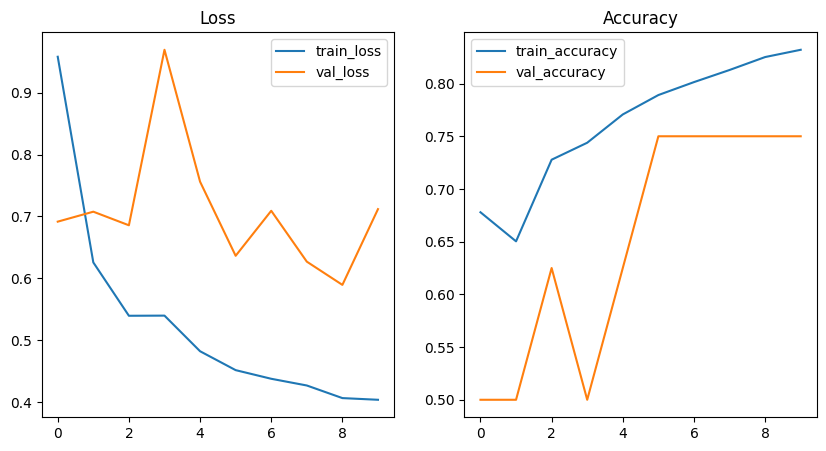

In [42]:
plot_results([model_1_results])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=5e-6)

In [48]:
model_2 = Sequential()

In [49]:
model_2.add(layers.Input(shape=(12288,)))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(25, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(2, activation='softmax'))

In [50]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model_2_results = model_2.fit(train_img_unrow_test, train_labels_test, epochs=50, batch_size=300, validation_data=(val_img_unrow_test, val_labels_test))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5701 - loss: 1.1095 - val_accuracy: 0.5000 - val_loss: 0.7671
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6364 - loss: 0.9256 - val_accuracy: 0.5000 - val_loss: 0.8678
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6406 - loss: 0.7586 - val_accuracy: 0.5000 - val_loss: 0.7164
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5948 - loss: 0.7108 - val_accuracy: 0.5000 - val_loss: 0.7048
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6720 - loss: 0.6586 - val_accuracy: 0.5000 - val_loss: 0.7024
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6806 - loss: 0.6890 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7086 - loss: 0.6260 - val_accuracy: 0.5000 - val_loss: 0.7037
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6883 - loss: 0.6428 - val_accuracy: 0.5000 - val_loss: 0.7032


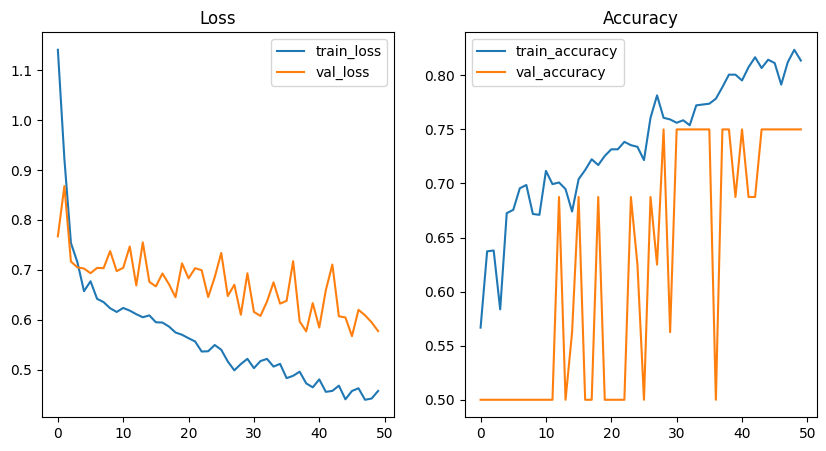

In [52]:
plot_results([model_2_results])

In [123]:
model_3 = Sequential()

In [124]:
model_3.add(layers.Input(shape=(12288,)))
model_3.add(Dense(50, activation='relu'))
model_3.add(Dense(50, activation='relu', kernel_regularizer=l2))
model_3.add(Dropout(0.5))
model_3.add(Dense(25, activation='relu'))
model_3.add(Dense(25, activation='relu', kernel_regularizer=l2(l2=0.25)))
model_3.add(Dropout(0.2))
model_3.add(Dense(10, activation='relu'))
model_3.add(Dense(2, activation='softmax'))

In [125]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [126]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [127]:
model_3_results = model_3.fit(train_img_unrow_test, train_labels_test, epochs=40, batch_size=350, validation_data=(val_img_unrow_test, val_labels_test), callbacks=[early_stop])

Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.7129 - loss: 7.5274 - val_accuracy: 0.5000 - val_loss: 7.1101
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7103 - loss: 7.0311 - val_accuracy: 0.5000 - val_loss: 6.8987
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6599 - loss: 6.8052 - val_accuracy: 0.5625 - val_loss: 6.6875
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7032 - loss: 6.5879 - val_accuracy: 0.5625 - val_loss: 6.4807
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7139 - loss: 6.3832 - val_accuracy: 0.5000 - val_loss: 6.2929
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7147 - loss: 6.1667 - val_accuracy: 0.5000 - val_loss: 6.1044
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7145 - loss: 5.9519 - val_accuracy: 0.5000 - val_loss: 5.9310
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7116 - loss: 5.7709 - val_accuracy: 0.5000 - val_loss: 5.7472

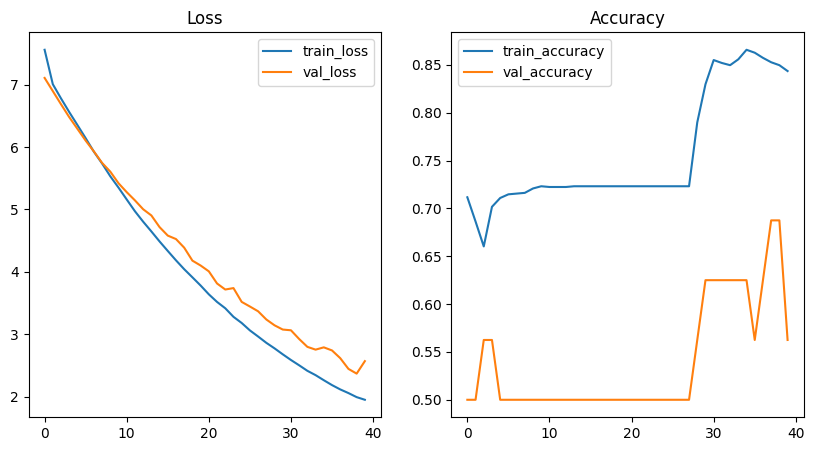

In [128]:
plot_results([model_3_results])

In [129]:
model_4 = Sequential()

In [130]:
model_4.add(layers.Input(shape=(12288,)))
model_4.add(Dense(75, activation='relu'))
model_4.add(Dense(50, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(50, activation='relu', kernel_regularizer=l2(l2=0.5)))
model_4.add(Dense(25, activation='relu'))
model_4.add(Dropout(0.25))
model_4.add(Dense(25, activation='relu', kernel_regularizer=l2(l2=0.25)))
model_4.add(Dense(10, activation='relu', kernel_regularizer=l2(l2=0.01)))
model_4.add(Dense(2, activation='softmax'))

In [131]:
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [132]:
model_4_results = model_4.fit(train_img_unrow_test, train_labels_test, epochs=60, batch_size=250, validation_data=(val_img_unrow_test, val_labels_test), callbacks=[early_stop])

Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5588 - loss: 31.6214 - val_accuracy: 0.5000 - val_loss: 30.0153
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6800 - loss: 29.4827 - val_accuracy: 0.5000 - val_loss: 28.0044
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6773 - loss: 27.5246 - val_accuracy: 0.5000 - val_loss: 26.1323
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7193 - loss: 25.6378 - val_accuracy: 0.5000 - val_loss: 24.3692
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7127 - loss: 23.8891 - val_accuracy: 0.5000 - val_loss: 22.7158
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7075 - loss: 22.2620 - val_accuracy: 0.5000 - val_loss: 21.1680
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7034 - loss: 20.7376 - val_accuracy: 0.5000 - val_loss: 19.7237
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7089 - loss: 19.3020 - val_accuracy: 0.5000 - va

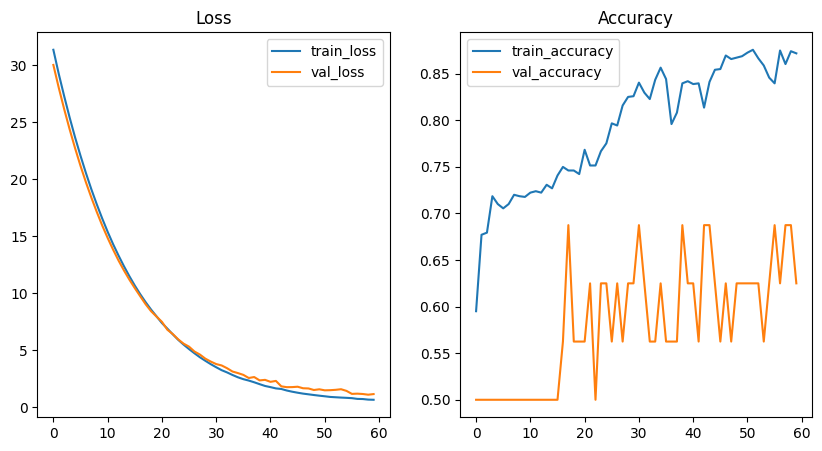

In [133]:
plot_results([model_4_results])

In [ ]:
model_5.add(layers.Dense(64, activation='relu'))
model_5.add(layers.BatchNormalization())

model_5.add(layers.Dense(32, activation='relu'))
model_5.add(layers.BatchNormalization())

model_5.add(layers.Dense(50, activation='relu'))
model_5.add(layers.BatchNormalization())

In [223]:
model_5 = models.Sequential()

In [224]:
model_5.add(layers.Conv2D(16, (5, 5), activation='relu', input_shape=(64, 64, 3)))
model_5.add(layers.BatchNormalization())
model_5.add(layers.MaxPooling2D())

model_5.add(layers.Conv2D(32, (3, 3), activation='relu', padding='valid'))
model_5.add(layers.BatchNormalization())
model_5.add(layers.Dropout(0.5))
model_5.add(layers.MaxPooling2D())

model_5.add(layers.Conv2D(64, (3, 3), activation='relu', padding='valid'))
model_5.add(layers.BatchNormalization())
model_5.add(layers.MaxPooling2D())

model_5.add(layers.Conv2D(128, (3, 3), activation='relu', padding='valid'))
model_5.add(layers.BatchNormalization())
model_5.add(layers.Dropout(0.1))
model_5.add(layers.MaxPooling2D())

model_5.add(layers.Flatten())
model_5.add(layers.Dense(2, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [225]:
model_5.compile(Adam(learning_rate=0.00025), loss='categorical_crossentropy', metrics=['accuracy'])

In [226]:
model_5_results = model_5.fit(train_images, train_labels, epochs=20, batch_size=310, validation_data=(val_images, val_labels), callbacks=[early_stop])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 887ms/step - accuracy: 0.7443 - loss: 0.6362 - val_accuracy: 0.5000 - val_loss: 7.9556
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 820ms/step - accuracy: 0.8881 - loss: 0.3146 - val_accuracy: 0.5000 - val_loss: 5.6406
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 941ms/step - accuracy: 0.9030 - loss: 0.2817 - val_accuracy: 0.5000 - val_loss: 5.2012
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 825ms/step - accuracy: 0.9263 - loss: 0.2095 - val_accuracy: 0.5000 - val_loss: 3.3265
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 946ms/step - accuracy: 0.9347 - loss: 0.1601 - val_accuracy: 0.5000 - val_loss: 2.3674
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 839ms/step - accuracy: 0.9489 - loss: 0.1411 - val_accuracy: 0.5000 - val_loss: 1.7900
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 801ms/step - accuracy: 0.9517 - loss: 0.1481 - val_accuracy: 0.5000 - val_loss: 1.0771
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 867ms/step - accuracy: 0.9573 - loss: 0.1107 - val_accuracy: 0.5000 - val_loss:

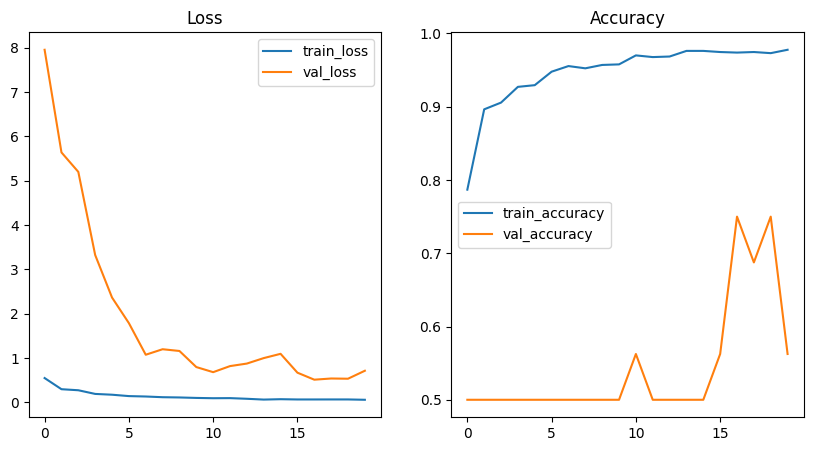

In [227]:
plot_results([model_5_results])

In [ ]:
data_augmentation = Sequential([layers.RandomFlip('horizontal_and_vertical'),
                                layers.RandomRotation(0.5),
                                layers.RandomZoom(0.2)])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=1e-6)

In [ ]:
model_6 = keras.Sequential([
    data_augmentation,
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(32, (3, 3), activation='relu', padding='valid'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu', padding='valid'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(2, activation='softmax')
    ])

In [ ]:
model_6.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_6_results = model_6.fit(train_images, train_labels, epochs=100, batch_size=250, validation_data=(val_images, val_labels), callbacks=[early_stop])

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.4407 - loss: 1.2731 - val_accuracy: 0.5000 - val_loss: 2.8930
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.4847 - loss: 1.1681 - val_accuracy: 0.5000 - val_loss: 2.2766
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5464 - loss: 1.0310 - val_accuracy: 0.5000 - val_loss: 1.9788
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6350 - loss: 0.8988 - val_accuracy: 0.5000 - val_loss: 1.7827
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6664 - loss: 0.8609 - val_accuracy: 0.5000 - val_loss: 1.6436
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7087 - loss: 0.7818 - val_accuracy: 0.5000 - val_loss: 1.5422
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7228 - loss: 0.7066 - val_accuracy: 0.5000 - val_loss: 1.4674
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7191 - loss: 0.7391 - val_accuracy: 0.5000 - val_loss

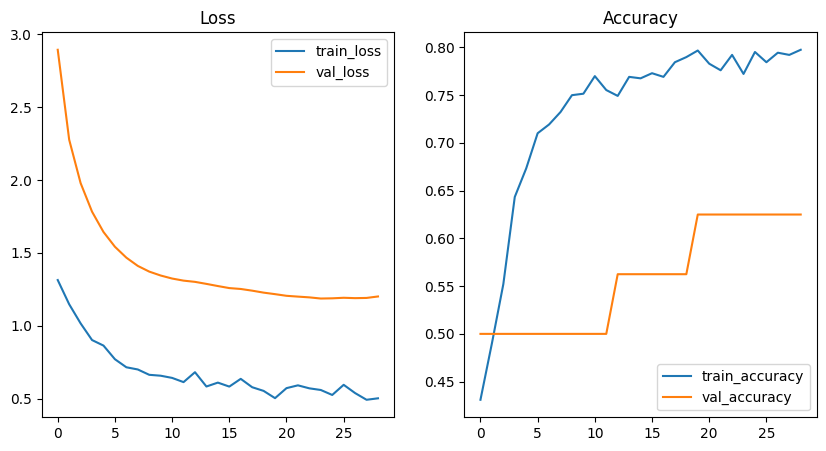

In [ ]:
plot_results([model_6_results])

# Evaluation